# Feedback analysis
___

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Yelp reviews

In [2]:
df = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', delimiter= '\t', header=None)

In [3]:
df.columns = ['review', 'positive']

In [5]:
df.head()

,review,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [6]:
df.shape

(1000, 2)

In [29]:
pd.Series(' '.join(df['review']).lower().split()).value_counts()

the            584
and            389
i              304
was            295
a              237
to             219
is             171
this           143
it             132
of             127
food           124
not            116
for            110
in             107
place          106
good            95
service         83
we              79
very            75
my              73
with            71
great           70
had             70
that            68
be              67
so              66
were            65
are             63
have            62
but             62
              ... 
likes            1
fiancé           1
insults          1
wedges           1
surprised        1
letting          1
sever            1
metro            1
sunglasses       1
baba             1
sooooo           1
class            1
spends           1
gyro             1
tonight          1
plastic          1
yelpers          1
pros             1
sunday           1
mess             1
son              1
proclaimed  

In [21]:
df['review'] = df['review'].str.lower()
df['review'] = df['review'].str.replace('[^\w\s]','')

In [1000]:
keywords = ['loved', 'not good', 'not tasty', 'great', 'worst', "won't", 'good', 'bad', 'nasty', 'was great', 'problem', 'angry', 'awful', 'disappointed', 'would not', 'lacked', 'overpriced', 'did not', 'best', 'beautiful', 'avoid', 'slow', 'prompt', 'mmm', 'recommend', 'amazing', 'cute', 'performed', 'wasnt good', 'decent', 'deal', 'happier', 'elsewhere', 'i like', 'redeeming', 'delight', 'deal', 'moist', 'fear', 'sick', 'tasty', 'nice', 'perfect', 'handmade', 'glad', 'wast', 'yummy', 'die for', 'fresh', 'sexy', 'will be back', 'quickly', 'fantastic', 'one of the b', 'wonderful', 'will go back', 'is not', 'go back', 'check it', 'friendly', 'ever', 'phenom', 'definitely worth', 'excellent', 'solid', 'rarely', 'wasnt helpful', 'wasnt very tasty', 'clean', 'right away', 'immediately', 'reasonab', 'always', 'delicious', 'dont go', 'bacon', 'fine dining', 'lovers', 'modern', 'definitely', 'healthy', 'incredible', 'interesting', 'really like', 'satisfied', 'is worth', 'delish', 'rich', 'bargain', 'fun', 'flavourful', 'much better', 'lighting', 'creamy', 'fast', 'they know', 'sticks', 'exquisite', 'definitely', 'waited', 'so good', 'happy', 'favorite place', 'sweet', 'i love', 'omg', 'its worth', 'ever had', 'outstanding', 'cool']

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df[str(key)] = df.review.str.contains(str(key), case=False)

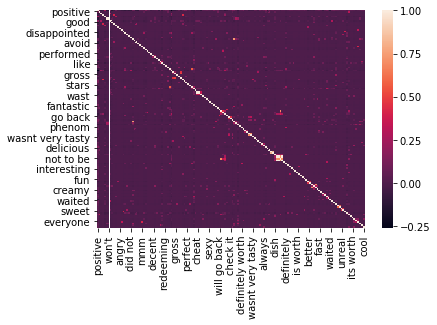

In [1001]:
sns.heatmap(df.corr())

In [1002]:
data = df[keywords]
target = df['positive']

In [1003]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()

bnb.fit(data, target)


y_pred = bnb.predict(data)

In [1008]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 150


# Amazon Reviews

In [1009]:
df2 = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', delimiter= '\t', header=None)

In [1011]:
df2.columns = ['review', 'positive']

In [1012]:
df2.head()

,review,positive
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [1013]:
df2['review'] = df2['review'].str.lower()
df2['review'] = df2['review'].str.replace('[^\w\s]','')
for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    df2[str(key)] = df.review.str.contains(str(key), case=False)

In [1014]:
data = df2[keywords]
target = df2['positive']
bnb = BernoulliNB()

bnb.fit(data, target)


y_pred = bnb.predict(data)

In [1015]:
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 416
